In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33)

N,D = X_train.shape

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Create Tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [10]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,input_shape=(D,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
#train the model
batch_size =32

# old way
#r = model.fit(
 #   X_train, y_train,
  #  validation_data=(X_test, y_test),
   # epochs=100)

# New
r = model.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=15,)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6540 - loss: 0.6285 - val_accuracy: 0.8830 - val_loss: 0.3926
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8943 - loss: 0.3656 - val_accuracy: 0.9149 - val_loss: 0.2616
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9420 - loss: 0.2465 - val_accuracy: 0.9309 - val_loss: 0.2015
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9599 - loss: 0.1878 - val_accuracy: 0.9521 - val_loss: 0.1709
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.1550 - val_accuracy: 0.9521 - val_loss: 0.1531
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9656 - loss: 0.1338 - val_accuracy: 0.9521 - val_loss: 0.1417
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9709 - loss: 0.1184 - val_accuracy: 0.9521 - val_loss: 0.1336
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9814 - loss: 0.1064 - val_accuracy: 0.9574 - val_lo

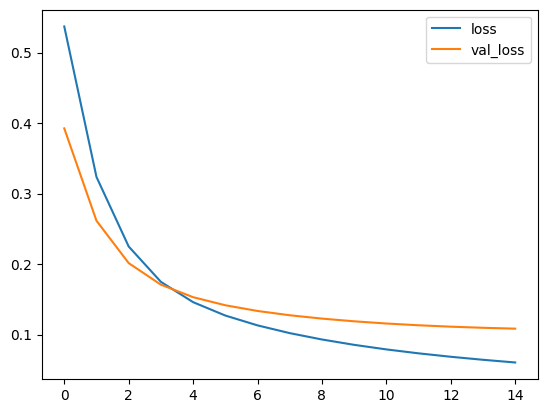

In [14]:
# Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

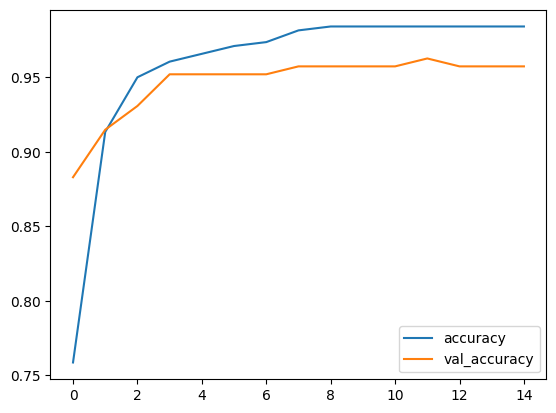

In [15]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [16]:
#Evaluate the model
print(model.evaluate(test_dataset.batch(batch_size)))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9669 - loss: 0.0940 
[0.108465276658535, 0.957446813583374]


In [17]:
# Example usage of batch method
dataset = tf.data.Dataset.from_tensor_slices([
     1, 2, 3, 4, 5,6,7,8,9,10
     ])

 # Batch elements into batches of size 4
batched_dataset = dataset.batch(3)

# iterate over batches
for batch in batched_dataset:
     print(batch.numpy())

[1 2 3]
[4 5 6]
[7 8 9]
[10]


In [18]:
shuffled = dataset.shuffle(buffer_size=3)
shuffled

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [19]:
batched_shuffled = shuffled.batch(3)
for batch in batched_shuffled:
     print(batch.numpy())

[2 1 5]
[6 3 7]
[ 9 10  8]
[4]


In [20]:
for batch in batched_shuffled:
     print(batch.numpy())

[2 1 5]
[3 6 7]
[ 8 10  4]
[9]


In [21]:
transformed = dataset.map(lambda x: x / 2)
batched_transformed = transformed.batch(3)
for batch in batched_transformed:
     print(batch.numpy())

[0.5 1.  1.5]
[2.  2.5 3. ]
[3.5 4.  4.5]
[5.]
